In [2]:
#conda env create -f environment.yml
#conda activate tsa_course ----> to activate the environment
#conda deactivate 

import pandas as pd
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
agro_order_pdt = pd.read_csv('agrofresc_order_product.csv',)
agro_orders = pd.read_csv('agrofresc_orders.csv')
city_temperature = pd.read_excel('cities_temperature.xlsx')

In [4]:
agro_order_pdt.head()

,id,quantity,product_id,order_id,created_at,updated_at,price,store_id
0,262621,24.0,59,30987,NaN,NaN,NaN,NaN
1,262622,36.0,83,30987,NaN,NaN,NaN,NaN
2,262623,36.0,86,30987,NaN,NaN,NaN,NaN
3,262624,36.0,88,30987,NaN,NaN,NaN,NaN
4,262625,144.0,97,30987,NaN,NaN,NaN,NaN


In [5]:
agro_orders.head()


,id,description,reference,ordered_at,delivery_at,closed_at,client_id,created_at,updated_at,deleted_at,user_id,channel_id
0,30987,500gr. IOGURT NATURAL,FR/32357,2017-03-31 00:00:00,2017-04-03 00:00:00,2017-04-03 08:25:52,49,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN
1,30988,Suc Veggie 1L,FR/32377,2017-03-31 00:00:00,2017-04-03 00:00:00,2017-04-03 08:25:59,1796,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN
2,30989,Suc Passion 1L,FR/32382,2017-03-31 00:00:00,2017-04-01 00:00:00,2017-04-03 08:26:07,1132,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN
3,30990,IOGURT MADUIXA pack2x125 gr.,FR/32338,2017-03-31 00:00:00,2017-04-01 00:00:00,2017-04-03 08:26:20,415,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN
4,30991,LLET NATURAL 1 L. PET,FR/32373,2017-03-31 00:00:00,2017-04-03 00:00:00,2017-04-03 08:26:33,78,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN


In [6]:
agro_merged = pd.merge(agro_order_pdt,agro_orders, left_on='order_id', right_on = 'id')
agro_merged.head()

,id_x,quantity,product_id,order_id,created_at_x,updated_at_x,price,store_id,id_y,description,reference,ordered_at,delivery_at,closed_at,client_id,created_at_y,updated_at_y,deleted_at,user_id,channel_id
0,262621,24.0,59,30987,NaN,NaN,NaN,NaN,30987,500gr. IOGURT NATURAL,FR/32357,2017-03-31 00:00:00,2017-04-03 00:00:00,2017-04-03 08:25:52,49,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN
1,262622,36.0,83,30987,NaN,NaN,NaN,NaN,30987,500gr. IOGURT NATURAL,FR/32357,2017-03-31 00:00:00,2017-04-03 00:00:00,2017-04-03 08:25:52,49,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN
2,262623,36.0,86,30987,NaN,NaN,NaN,NaN,30987,500gr. IOGURT NATURAL,FR/32357,2017-03-31 00:00:00,2017-04-03 00:00:00,2017-04-03 08:25:52,49,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN
3,262624,36.0,88,30987,NaN,NaN,NaN,NaN,30987,500gr. IOGURT NATURAL,FR/32357,2017-03-31 00:00:00,2017-04-03 00:00:00,2017-04-03 08:25:52,49,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN
4,262625,144.0,97,30987,NaN,NaN,NaN,NaN,30987,500gr. IOGURT NATURAL,FR/32357,2017-03-31 00:00:00,2017-04-03 00:00:00,2017-04-03 08:25:52,49,2018-09-20 19:47:34,2018-09-20 19:47:34,NaN,NaN,NaN


In [7]:
agro_merged['ordered_at'] = pd.to_datetime(agro_merged['ordered_at'])
agro_merged.info()
agro_merged_1 = agro_merged[['quantity','product_id','ordered_at']]
agro_merged_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993544 entries, 0 to 993543
Data columns (total 20 columns):
id_x            993544 non-null int64
quantity        993544 non-null float64
product_id      993544 non-null int64
order_id        993544 non-null int64
created_at_x    497918 non-null object
updated_at_x    497918 non-null object
price           472238 non-null float64
store_id        0 non-null float64
id_y            993544 non-null int64
description     993544 non-null object
reference       993544 non-null object
ordered_at      993544 non-null datetime64[ns]
delivery_at     993544 non-null object
closed_at       993544 non-null object
client_id       993544 non-null int64
created_at_y    993544 non-null object
updated_at_y    993544 non-null object
deleted_at      0 non-null float64
user_id         0 non-null float64
channel_id      0 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(5), object(8)
memory usage: 159.2+ MB


,quantity,product_id,ordered_at
0,24.0,59,2017-03-31
1,36.0,83,2017-03-31
2,36.0,86,2017-03-31
3,36.0,88,2017-03-31
4,144.0,97,2017-03-31


In [8]:
prod_1_daily = agro_merged_1[agro_merged_1['product_id']==1]
prod_1_daily.set_index('ordered_at',inplace=True)
prod_1_daily.drop(labels = 'product_id', axis =1, inplace=True)
prod_1_daily.head(10)

,quantity
ordered_at,
2017-03-31,6.0
2017-03-31,4.0
2017-03-31,6.0
2017-03-31,18.0
2017-03-31,6.0
2017-03-31,12.0
2017-03-31,6.0
2017-04-03,6.0
2017-04-03,6.0


In [9]:
#Dropping mar 2017 as it has incomplete month data
prod_1_daily = prod_1_daily.loc['2017-04-01':]
prod_1_daily = prod_1_daily.groupby(by = 'ordered_at',).sum()
#agro_pivot.drop(['YrMon'], axis =1,inplace=True)
prod_1_daily.head(15)

,quantity
ordered_at,
2017-04-03,844.0
2017-04-04,648.0
2017-04-05,426.0
2017-04-06,615.0
2017-04-07,119.0
2017-04-10,1186.0
2017-04-11,341.0
2017-04-12,520.0
2017-04-13,25.0


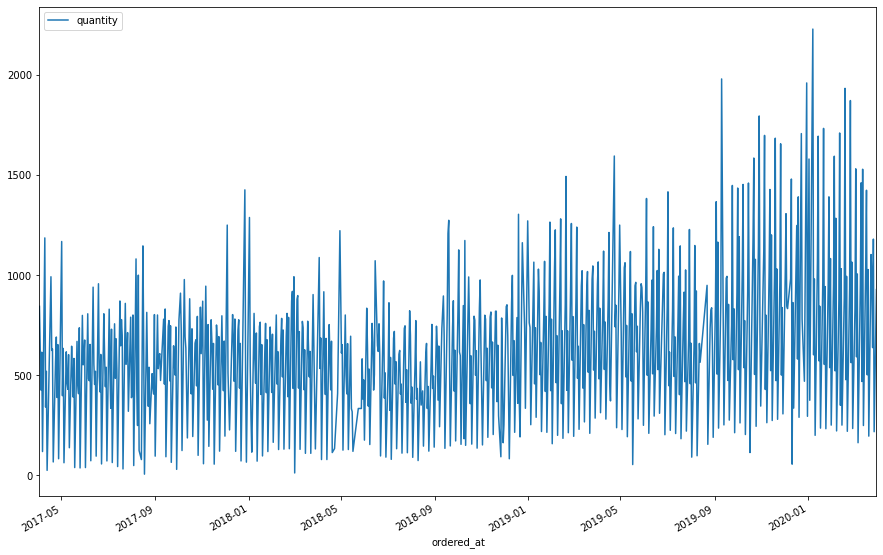

In [10]:
#agro_pivot.fillna(0,inplace=True)
prod_1_daily.plot(figsize=(15,10));
#agro_merged.isna().sum()

In [11]:
prod_1_daily = prod_1_daily.asfreq(freq = 'D', fill_value=0.1)
prod_1_daily.index

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-09', '2017-04-10',
               '2017-04-11', '2017-04-12',
               ...
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30'],
              dtype='datetime64[ns]', name='ordered_at', length=1093, freq='D')

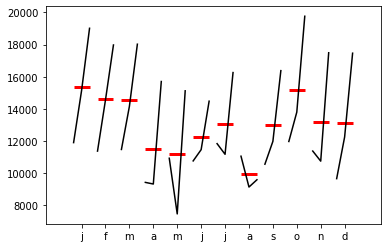

In [12]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

dfm = prod_1_daily['quantity'].resample(rule = 'MS').sum()
month_plot(dfm);

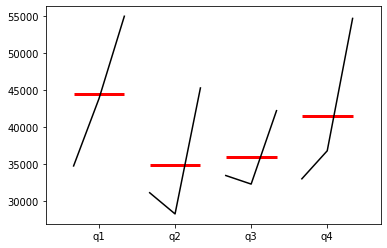

In [13]:
dfq = prod_1_daily['quantity'].resample(rule='Q').sum()

quarter_plot(dfq);

In [14]:
prod_1_daily['MA6'] = prod_1_daily['quantity'].rolling(6).mean()

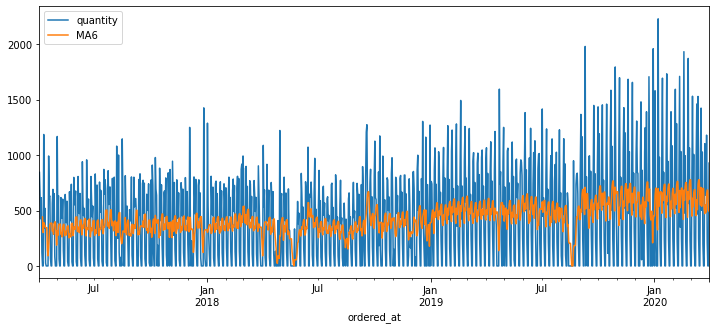

In [15]:
prod_1_daily.plot(figsize=(12,5)).autoscale(axis = 'x',tight = True);

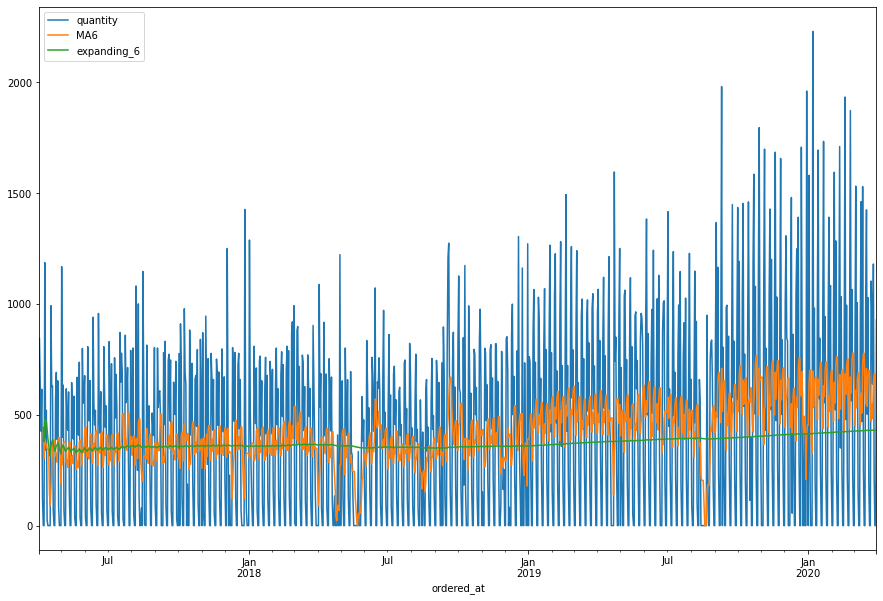

In [16]:
prod_1_daily['expanding_6']=prod_1_daily['quantity'].expanding(min_periods = 6).mean()
prod_1_daily.plot(figsize=(15,10))

## Hodrick Prescott Filter

This filter analyses the time series data as a sum of two factors: trend and cyclicity
Hence, any datapoint = trend_factor + cyclicity_factor

In [17]:
#from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.filters.hp_filter import hpfilter

#prod_1_cyclical_hp, prod_1_trend_hp = hpfilter(prod_1_daily['quantity', lamb= 129600)
#129600 as the data is monthly, 1600 for quarterly and 6.25 for annual intervals

In [18]:
#prod_1_daily[prod_1_daily['quantity']<=0]

Skipped this method as the lambda value for a daily calculation is so huge that is going to generate a straight line.

## ETS decomposition

ETS stands for Error, Trend and Seasonality. This establishes an annual seasonality, trend and error componenets for our data

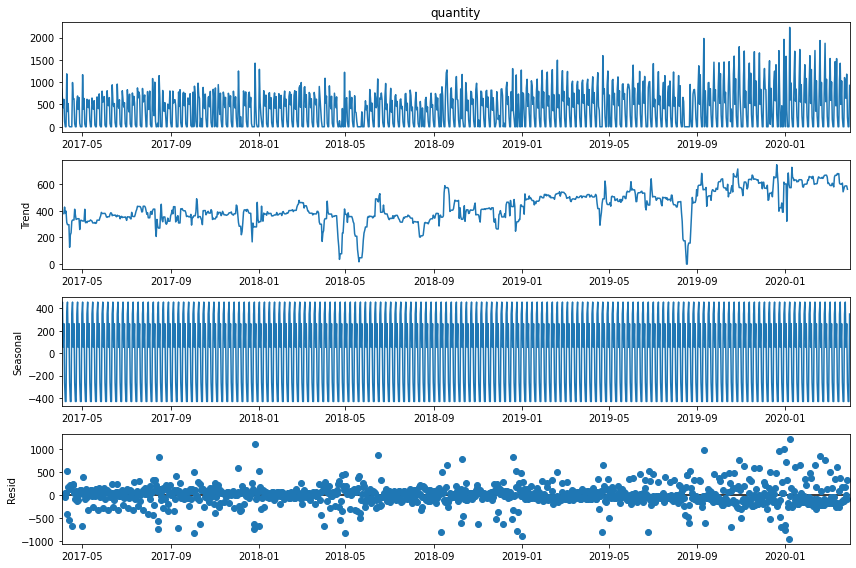

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
from pylab import rcParams

rcParams['figure.figsize'] = 12,8
#as the growth in sales for product 1 is not linear, we decompose using multiplicative models rather than an additive model
prod_1_ETS = seasonal_decompose(prod_1_daily['quantity'])  # model='mul' also works
prod_1_ETS.plot();

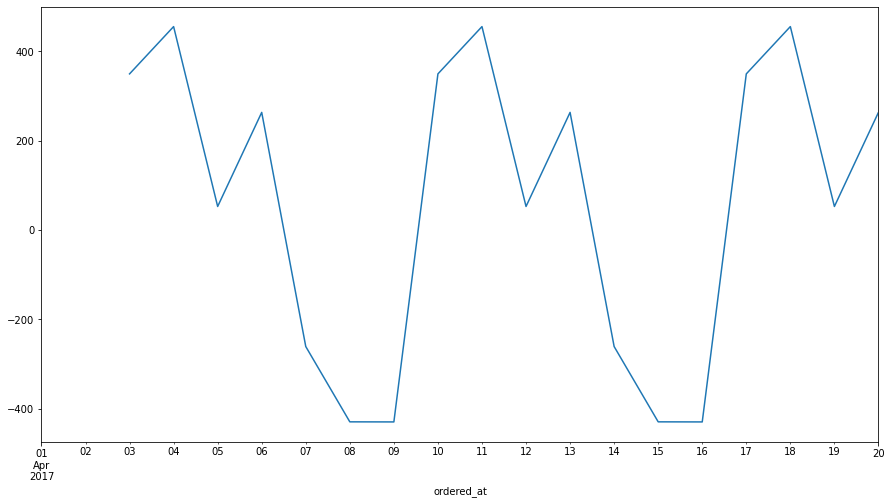

In [20]:
prod_1_ETS.seasonal.plot(figsize=(15,8),xlim=['2017-04-01','2017-04-20']);

### The above graph shows that the data has a weekly seasonality

## Simple Exponential Weighted Moving Average (Simple EWMA)

This model gives more weight to recent events and less weight to very old events, it means that the recent data has more impact on our future predictions. The <em>Simple Exponential Smoothing</em> with analyses data using only one smoothing factor <strong>α</strong>. Unfortunately, this technique does a poor job of forecasting when there is a trend or seasonlaity in the data as seen above. <em>Double</em> and <em>Triple Exponential Smoothing</em> helps us to address this situation i.e. the Holt-Winters Methods.

In [87]:
alpha = np.linspace(0,1,11)
alpha

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [92]:
prod_1_daily.shape

(1093, 4)

In [214]:
train = prod_1_daily[['quantity']].iloc[:1000]
test = prod_1_daily[['quantity']].iloc[1000:]
train.shape

(1000, 1)

In [110]:
#a = pd.DataFrame()
#b = [1,2,3,4,5]
#c= pd.Series(b)
#a['new'] = c
a

,new


In [174]:
total = 0
for i in range(10):
    {
        #print(i)
        total = total +i
        #print(i)
    }
total

SyntaxError: invalid syntax (<ipython-input-174-873f48945c8d>, line 5)

In [149]:
range(10)

range(0, 10)

In [127]:
a = pd.DataFrame()
SES= train
#for i in alpha:
 #   {
  #      c = i
        #a['new'] = SES['quantity'].ewm(alpha = 0.1, adjust = False)
        #SES[f'SES{i}'] = a
        
   # }
#prod_1_daily['EWM6'] = prod_1_daily['quantity'].ewm(span = 7, adjust = False).mean()
SES['SES7'] = SES['quantity'].ewm(alpha = .7, adjust = False).mean()
SES['SES8'] = SES['quantity'].ewm(alpha = .8, adjust = False).mean()
SES['SES9'] = SES['quantity'].ewm(alpha = .9, adjust = False).mean()
SES['SES10'] = SES['quantity'].ewm(alpha = .10, adjust = False).mean()
SES['SES5'] = SES['quantity'].ewm(alpha = .5, adjust = False).mean()
SES['SES6'] = SES['quantity'].ewm(alpha = .6, adjust = False).mean()

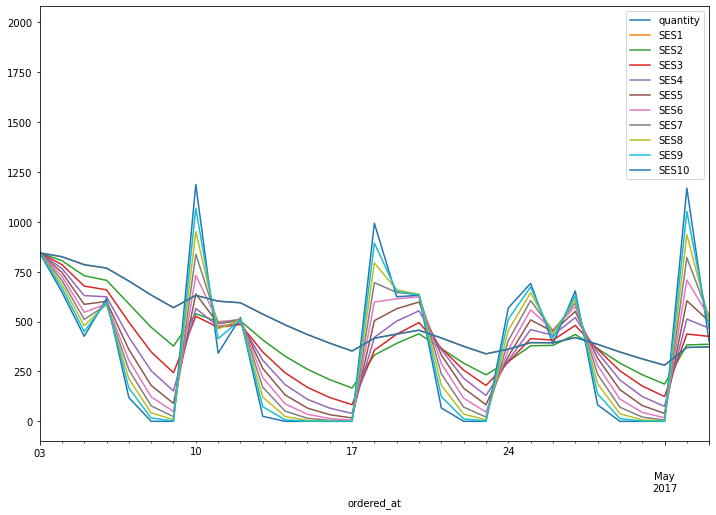

In [128]:
SES.plot(xlim=('2017-04-03','2017-05-03'))

In [193]:
m=0
for i in range(1,11):
    {
        print(rmse(SES['quantity'], SES['SES{}'.format(i)]))
        #print(i)
    }

374.27729318876277
344.27991186600053
310.4147681981708
272.4153878590238
231.01611235975838
187.25823347838167
142.04438608589908
95.85315946550284
48.660343532457
374.27729318876277


### alpha = 0.9 gave better results

In [194]:
prod_1_daily.head()

,quantity,MA6,expanding_6,EWM6,EWM,SES,1,DESadd12,DESmul12
ordered_at,,,,,,,,,
2017-04-03,844.0,NaN,NaN,844.000000,844.0000,844.0000,844.0,844.018837,505.860255
2017-04-04,648.0,NaN,NaN,795.000000,667.6000,667.6000,648.0,821.223210,394.766591
2017-04-05,426.0,NaN,NaN,702.750000,450.1600,450.1600,426.0,773.079498,304.911962
2017-04-06,615.0,NaN,NaN,680.812500,598.5160,598.5160,615.0,748.146708,247.782379
2017-04-07,119.0,NaN,NaN,540.359375,166.9516,166.9516,119.0,666.656742,185.630904


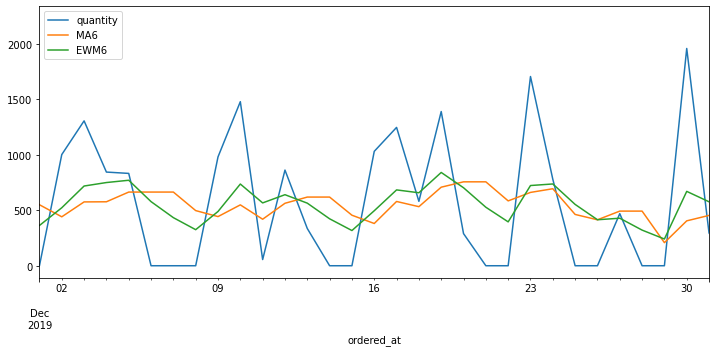

In [195]:
prod_1_daily['EWM'] = SES['SES9']
prod_1_daily[['quantity','MA6','EWM6']].plot(figsize=(12,5), xlim = ('2019-12-01','2019-12-31'));

## Holt-Winters Double and Triple EWMA

Double EWMA adds another smoothing factor to take trend into consideration but doesn't account for seasonality. Triple EWMA introduces a seasonality factor

In [200]:
#Simple EWMA using holt-winters, alternative method for using '.ewm' function
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#span = 12
alpha = 0.9

prod_1_daily['SES']=SimpleExpSmoothing(prod_1_daily['quantity']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
prod_1_daily['2019-12-01':'2019-12-31'].tail()

,quantity,MA6,expanding_6,EWM6,EWM,SES,1,DESadd12,DESmul12
ordered_at,,,,,,,,,
2019-12-27,470.0,492.883333,413.799900,428.762365,423.865570,423.865570,470.0,502.452482,544.825858
2019-12-28,0.1,492.883333,413.386200,321.596774,42.476557,42.476557,0.1,437.228490,512.317468
2019-12-29,0.1,208.400000,412.973327,241.222580,NaN,4.337656,0.1,374.026653,480.414860
2019-12-30,1960.0,405.066667,414.517265,670.916935,NaN,1764.433766,1960.0,541.356016,557.315541
2019-12-31,295.0,454.216667,414.398106,576.937701,NaN,441.943377,295.0,513.078897,541.855572


In [191]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#prod_1_daily[1] = prod_1_daily['quantity'].astype('double')
prod_1_daily['DESadd12'] = ExponentialSmoothing(prod_1_daily[1], trend='add').fit().fittedvalues.shift(-1)
prod_1_daily['DESmul12'] = ExponentialSmoothing(prod_1_daily[1], trend='mul').fit().fittedvalues.shift(-1)
prod_1_daily.tail()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,quantity,MA6,expanding_6,EWM6,EWM,SES,1,DESadd12,DESmul12
ordered_at,,,,,,,,,
2020-03-26,1180.0,647.866667,431.125712,781.209876,NaN,1129.106985,1180.0,676.677746,679.807051
2020-03-27,218.0,684.183333,430.930183,640.407407,NaN,309.110698,218.0,629.054577,655.910950
2020-03-28,0.1,684.183333,430.535289,480.330555,NaN,31.001070,0.1,556.538505,620.060682
2020-03-29,0.1,500.366667,430.141117,360.272916,NaN,3.190107,0.1,485.490181,584.546698
2020-03-30,928.0,494.033333,430.596615,502.204687,NaN,NaN,928.0,NaN,NaN


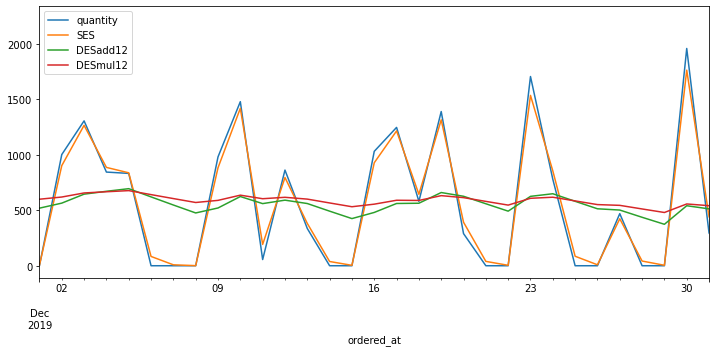

In [192]:
prod_1_daily[['quantity', 'SES','DESadd12','DESmul12']].plot(figsize=(12,5), xlim=('2019-12-01','2019-12-31'))

In [189]:
rmse(prod_1_daily['quantity'][:-1], prod_1_daily['DESmul12'][:-1])

410.82265046084143

In [201]:
rmse(prod_1_daily['quantity'][:-1], prod_1_daily['DESadd12'][:-1])

396.2327156408611

In [205]:
rmse(prod_1_daily['quantity'][:-1], prod_1_daily['SES'][:-1])

51.86767237930934

#### Result: Multiplicative trend is giving more accuracy for double EWMA when comared to additive model

In [225]:
prod_1_daily['TESaa12'] = ExponentialSmoothing(prod_1_daily['quantity'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
prod_1_daily['TESmm12'] = ExponentialSmoothing(prod_1_daily['quantity'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
prod_1_daily['TESam12'] = ExponentialSmoothing(prod_1_daily['quantity'],trend='add',seasonal='mul',seasonal_periods=7).fit().fittedvalues
prod_1_daily['TESma12'] = ExponentialSmoothing(prod_1_daily['quantity'],trend='mul',seasonal='add',seasonal_periods=7).fit().fittedvalues
prod_1_daily.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,quantity,MA6,expanding_6,EWM6,EWM,SES,1,DESadd12,DESmul12,TESadd12,TESmul12,TESaa12,TESmm12,TESam12,TESma12
ordered_at,,,,,,,,,,,,,,,
2017-04-03,844.0,NaN,NaN,844.000000,844.0000,844.0000,844.0,844.018837,505.860255,844.010000,814.769537,844.010000,814.769537,844.010801,843.436207
2017-04-04,648.0,NaN,NaN,795.000000,667.6000,667.6000,648.0,821.223210,394.766591,648.019446,605.092956,648.019446,605.092956,648.000002,646.904035
2017-04-05,426.0,NaN,NaN,702.750000,450.1600,450.1600,426.0,773.079498,304.911962,426.028341,385.562950,426.028341,385.562950,425.999999,424.403268
2017-04-06,615.0,NaN,NaN,680.812500,598.5160,598.5160,615.0,748.146708,247.782379,615.036689,540.627862,615.036689,540.627862,615.000000,612.933616
2017-04-07,119.0,NaN,NaN,540.359375,166.9516,166.9516,119.0,666.656742,185.630904,119.044497,101.815942,119.044497,101.815942,119.000000,116.494720


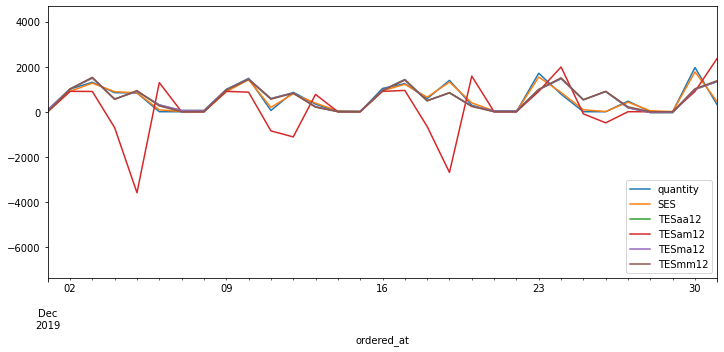

In [226]:
prod_1_daily[['quantity','SES','TESaa12','TESam12','TESma12','TESmm12']].plot(figsize=(12,5), xlim=('2019-12-01','2019-12-31'));

In [227]:
rmse(prod_1_daily['quantity'], prod_1_daily['TESaa12'])

220.62429503147203

In [228]:
rmse(prod_1_daily['quantity'], prod_1_daily['TESam12'])

1315.2061727176836

In [229]:
rmse(prod_1_daily['quantity'], prod_1_daily['TESma12'])

220.4805678266473

In [230]:
rmse(prod_1_daily['quantity'], prod_1_daily['TESmm12'])

217.78919369620507

In [232]:
prod_1_daily.shape

(1093, 15)

In [233]:
#train = prod_1_daily.iloc[:30]
#test = prod_1_daily.iloc[30:]
#train= train[['quantity']]
#test = test[['quantity']]
test.head(10)

,quantity
ordered_at,
2019-12-29,0.1
2019-12-30,1960.0
2019-12-31,295.0
2020-01-01,0.1
2020-01-02,1580.0
2020-01-03,375.0
2020-01-04,0.1
2020-01-05,0.1
2020-01-06,0.1


In [239]:
TES_train_model_1 = ExponentialSmoothing(prod_1_daily['quantity'],trend='mul',seasonal='add',seasonal_periods=7).fit()
TES_train_model_2 = ExponentialSmoothing(prod_1_daily['quantity'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [240]:
test['TES_Predictions_1'] = TES_train_model_1.predict(start = len(train), end = len(train)+len(test)-1)
test['TES_Predictions_2'] = TES_train_model_2.predict(start = len(train), end = len(train)+len(test)-1)

In [242]:
test.head()

,quantity,TES_Predictions_1,TES_Predictions_2
ordered_at,,,
2019-12-29,0.1,-36.728651,0.100951
2019-12-30,1960.0,992.232959,1018.315493
2019-12-31,295.0,1339.358899,1378.084723
2020-01-01,0.1,398.281151,449.308385
2020-01-02,1580.0,727.534495,766.882048


In [243]:
rmse(test['TES_Predictions_1'],test['quantity'])

279.469560220875

In [244]:
rmse(test['TES_Predictions_2'], test['quantity'])

276.44793236619165

In [245]:
test['quantity'].mean()

615.6548387096772

A multiplicative seasonality model gave a better prediction over additive seasonality, with an RMSE of 898 for a data that has a mean of 16023

In [340]:
def smape(actual,predict):
    Abs_diff = pd.DataFrame()
    Abs_diff['Abs_error'] = np.fabs(actual-predict)
    Abs_diff['Average'] = (np.fabs(actual)+np.fabs(predict))/2
    Abs_diff['Absolute_error'] = Abs_diff['Abs_error']/Abs_diff['Average']
    SMAPE = (100*Abs_diff['Absolute_error'].sum())/len(actual)
    return SMAPE
    

In [247]:
smape(test['quantity'],test['TES_Predictions_2'])

18.455260257992418

In [252]:
TES_final_model = ExponentialSmoothing(prod_1_daily['quantity'],trend='mul',seasonal='mul',seasonal_periods=7).fit()
prod_1_pred = pd.DataFrame()
prod_1_pred['TES_predictions'] = TES_final_model.predict(start = len(prod_1_daily), end = len(prod_1_daily)+3)
                                    #TES_final_model.forecast(4)   ----> also gives the same results

In [253]:
TES_final_model.forecast(4)

2020-03-31    1479.995354
2020-04-01     503.535686
2020-04-02    1060.940258
2020-04-03     234.577512
Freq: D, dtype: float64

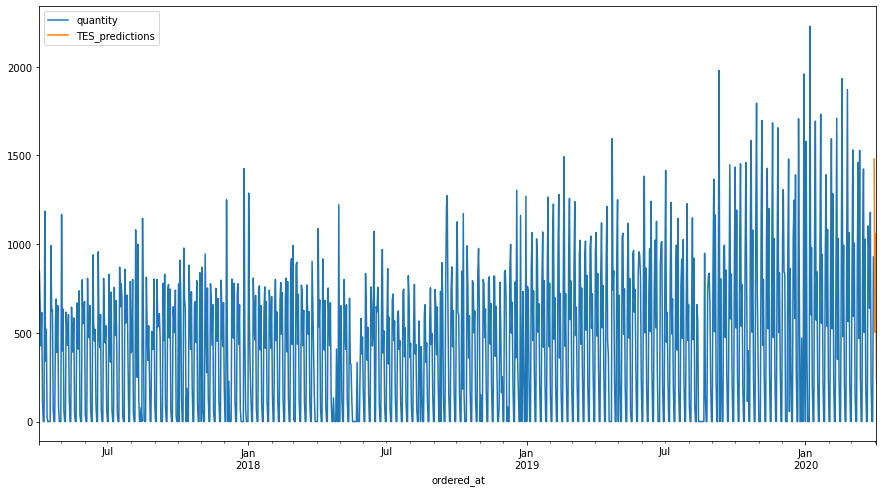

In [254]:
prod_1_daily['quantity'].plot(figsize = (15,8),legend = True);
#test['TES_Predictions_2'].plot(legend=True)
prod_1_pred['TES_predictions'].plot(legend=True);

## Checking Stationarity of data

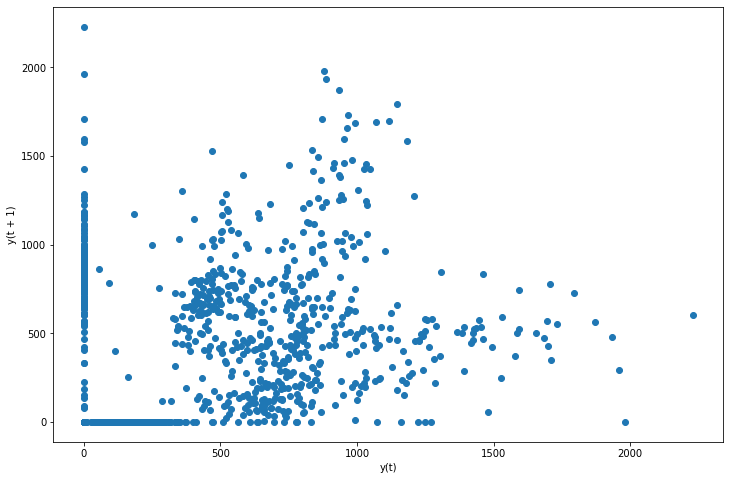

In [255]:
from pandas.plotting import lag_plot

lag_plot(prod_1_daily['quantity']);

In [256]:
from statsmodels.tsa.stattools import ccovf,ccf,periodogram
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [257]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

# Alternative:
# from sklearn.metrics import mean_squared_error

### Augmented Dickey Fuller test (to check stationarity)

In [258]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title='AgroFresc Product 1'):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [259]:
adf_test(prod_1_daily['quantity'])

Augmented Dickey-Fuller Test: AgroFresc Product 1
ADF test statistic        -2.617013
p-value                    0.089532
# lags used               22.000000
# observations          1070.000000
critical value (1%)       -3.436476
critical value (5%)       -2.864245
critical value (10%)      -2.568210
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [260]:
from statsmodels.tsa.statespace.tools import diff
prod_1_daily['diff_1'] = diff(prod_1_daily['quantity'], k_diff =1)

In [261]:
adf_test(prod_1_daily['diff_1'])

Augmented Dickey-Fuller Test: AgroFresc Product 1
ADF test statistic     -1.171180e+01
p-value                 1.482922e-21
# lags used             2.100000e+01
# observations          1.070000e+03
critical value (1%)    -3.436476e+00
critical value (5%)    -2.864245e+00
critical value (10%)   -2.568210e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The above data concludes that the value of 'd' in (p,d,q) of ARIMA is 1, as after one difference the data became stationary

## Auto-ARIMA modelling

In [280]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders

### Predicting assuming that the data doesnt have any seasonality

In [281]:
model = auto_arima(prod_1_daily['quantity'], start_p=1,start_q=1, seasonal=False, trace=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=16268.102, BIC=16288.085, Time=0.599 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=16807.287, BIC=16817.278, Time=0.027 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=16738.236, BIC=16753.224, Time=0.051 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=16314.783, BIC=16329.771, Time=0.266 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=16805.287, BIC=16810.283, Time=0.012 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=16205.947, BIC=16230.925, Time=0.877 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=16244.592, BIC=16269.571, T

In [283]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -8097.973
Date:                Sat, 04 Jul 2020   AIC                          16205.947
Time:                        22:20:34   BIC                          16230.925
Sample:                             0   HQIC                         16215.400
                               - 1093                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2538      0.046      5.528      0.000       0.164       0.344
ar.L1          0.2587      0.029      8.948      0.000       0.202       0.315
ar.L2         -0.2393      0.024     -9.781      0.000      -0.287      -0.191
ma.L1         -1.0000      1.248     -0.801      0.423      -3.447       1.447
sigma2      1.607e+05   1.99e+05      0.806      0.420    -2.3e+05    5.52e+05
===================================================================================
Ljung-Box (Q):                     3589.91   Jarque-Bera (JB):                92.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### The result proves the value of d from ADF test

In [284]:
arima_train_model = ARIMA(train['quantity'].astype(float),(2,1,1)).fit()

In [285]:
arima_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.quantity   No. Observations:                  999
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -7347.955
Method:                       css-mle   S.D. of innovations            377.683
Date:                Sat, 04 Jul 2020   AIC                          14705.910
Time:                        22:20:38   BIC                          14730.444
Sample:                    04-04-2017   HQIC                         14715.235
                         - 12-28-2019                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2216      0.085      2.599      0.009       0.055       0.389
ar.L1.D.quantity     0.2874      0.031      9.336      0.000       0.227       0.348
ar.L2.D.quantity    -0.2548      0.031     -8.282      0.000      -0.315      -0.195
ma.L1.D.quantity    -0.9945      0.005   -202.814      0.000      -1.004      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5640           -1.8991j            1.9811           -0.2041
AR.2            0.5640           +1.8991j            1.9811            0.2041
MA.1            1.0056           +0.0000j            1.0056            0.0000
-----------------------------------------------------------------------------
"""

In [286]:
start=len(train)
end=len(train)+len(test)-1
test['arima_211_predictions'] = arima_train_model.predict(start=start, end=end, dynamic=False, typ='levels')

In [287]:
rmse(test['quantity'], test['arima_211_predictions'])

602.673633745599

In [288]:
smape(test['quantity'], test['arima_211_predictions'])

105.49070384909552

### Non-seasonal ARIMA is performing worse than Triple Exponenetial Smoothing model



In [289]:
arima_final_model = ARIMA(prod_1_daily['quantity'].astype(float), order = (2,1,1)).fit()

In [290]:
prod_1_pred['ARIMA_211_predictions'] = arima_final_model.predict(start=len(prod_1_daily), end= len(prod_1_daily)+3, 
                                                                 dynamic=False, typ= 'levels')

In [291]:
prod_1_pred

,TES_predictions,ARIMA_211_predictions
2020-03-31,1479.995354,826.006046
2020-04-01,503.535686,575.002235
2020-04-02,1060.940258,535.900313
2020-04-03,234.577512,587.084993


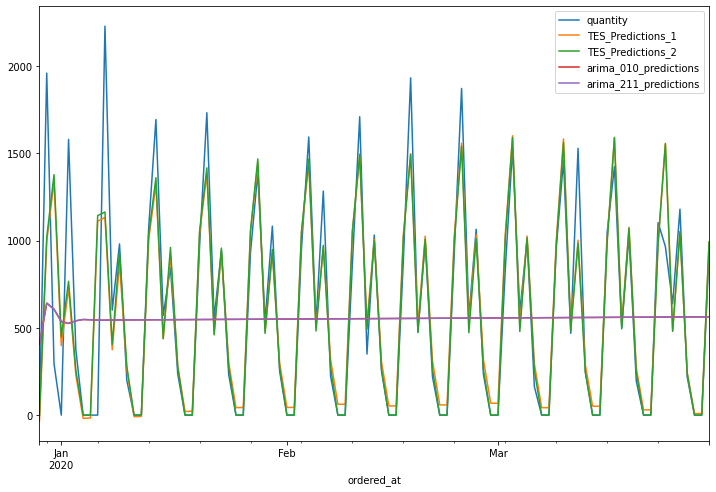

In [292]:
test.plot()

## Predicting with ARIMA by considering seasonality :SARIMA

In [293]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [294]:
auto_arima(prod_1_daily['quantity'], seasonal=True, m=7, trace=True, start_P=0, start_Q=0, max_P=3, max_Q=3, max_D=3).summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,7) [intercept=True]; AIC=16239.049, BIC=16269.023, Time=1.404 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=16807.287, BIC=16817.278, Time=0.024 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=15839.398, BIC=15859.381, Time=1.234 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=15840.064, BIC=15860.047, Time=1.072 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=16805.287, BIC=16810.283, Time=0.015 seconds
Fit ARIMA(1,1,0)x(0,0,0,7) [intercept=True]; AIC=16738.236, BIC=16753.224, Time=0.055 seconds
Fit ARIMA(1,1,0)x(2,0,0,7) [intercept=True]; AIC=15603.820, BIC=15628.799, Time=3.131 seconds


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,0)x(3,0,0,7) [intercept=True]; AIC=15545.556, BIC=15575.530, Time=11.129 seconds
Near non-invertible roots for order (1, 1, 0)(3, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,0)x(2,0,1,7) [intercept=True]; AIC=15521.211, BIC=15551.186, Time=4.406 seconds
Near non-invertible roots for order (1, 1, 0)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,0)x(1,0,1,7) [intercept=True]; AIC=15396.579, BIC=15421.558, Time=1.528 seconds
Fit ARIMA(1,1,0)x(0,0,1,7) [intercept=True]; AIC=16324.577, BIC=16344.560, Time=0.795 seconds
Fit ARIMA(1,1,0)x(1,0,2,7) [intercept=True]; AIC=15404.201, BIC=15434.176, Time=4.546 seconds
Fit ARIMA(1,1,0)x(0,0,2,7) [intercept=True]; AIC=16072.100, BIC=16097.079, Time=2.434 seconds


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,0)x(2,0,2,7) [intercept=True]; AIC=15424.200, BIC=15459.170, Time=8.018 seconds
Near non-invertible roots for order (1, 1, 0)(2, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(1,0,1,7) [intercept=True]; AIC=15681.659, BIC=15701.642, Time=2.232 seconds
Fit ARIMA(2,1,0)x(1,0,1,7) [intercept=True]; AIC=15251.032, BIC=15281.007, Time=2.702 seconds
Fit ARIMA(2,1,0)x(0,0,1,7) [intercept=True]; AIC=16258.389, BIC=16283.368, Time=0.964 seconds
Fit ARIMA(2,1,0)x(1,0,0,7) [intercept=True]; AIC=15691.272, BIC=15716.251, Time=2.157 seconds
Fit ARIMA(2,1,0)x(2,0,1,7) [intercept=True]; AIC=15254.746, BIC=15289.716, Time=5.312 seconds


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,0)x(1,0,2,7) [intercept=True]; AIC=15411.842, BIC=15446.813, Time=5.284 seconds
Near non-invertible roots for order (2, 1, 0)(1, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,0)x(0,0,0,7) [intercept=True]; AIC=16696.450, BIC=16716.433, Time=0.120 seconds
Fit ARIMA(2,1,0)x(0,0,2,7) [intercept=True]; AIC=15992.555, BIC=16022.529, Time=1.814 seconds


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,0)x(2,0,0,7) [intercept=True]; AIC=15451.552, BIC=15481.527, Time=5.342 seconds
Fit ARIMA(2,1,0)x(2,0,2,7) [intercept=True]; AIC=15267.294, BIC=15307.261, Time=9.213 seconds
Near non-invertible roots for order (2, 1, 0)(2, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,0)x(1,0,1,7) [intercept=True]; AIC=15432.294, BIC=15467.265, Time=5.348 seconds
Near non-invertible roots for order (3, 1, 0)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,1)x(1,0,1,7) [intercept=True]; AIC=15746.294, BIC=15781.264, Time=3.737 seconds
Near non-invertible roots for order (2, 1, 1)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,1,1)x(1,0,1,7) [intercept=True]; AIC=15740.632, BIC=15770.607, Time=1.944 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(3,1,1)x(1,0,1,7) [intercept=True]; AIC=15764.921, BIC=15804.888, Time=4.449 seconds
Near non-invertible roots for order (3, 1, 1)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1093
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -7619.516
Date:                             Sat, 04 Jul 2020   AIC                          15251.032
Time:                                     22:23:58   BIC                          15281.007
Sample:                                          0   HQIC                         15262.376
                                            - 1093                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.172     -0.001      1.000      -0.337       0.337
ar.L1         -0.6833      0.017    -39.928      0.000      -0.717      -0.650
ar.L2         -0.3629      0.020    -18.528      0.000      -0.401      -0.325
ar.S.L7        1.0000   2.01e-06   4.98e+05      0.000       1.000       1.000
ma.S.L7       -0.9065      0.010    -86.670      0.000      -0.927      -0.886
sigma2      6.412e+04   6.06e-07   1.06e+11      0.000    6.41e+04    6.41e+04
===================================================================================
Ljung-Box (Q):                      202.43   Jarque-Bera (JB):              1387.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+26. Standard errors may be unstable.
"""

In [313]:
sarima_train_model = SARIMAX(train['quantity'], order= (2, 1, 0), seasonal_order=(1, 0, 1, 7), enforce_invertibility=False).fit()

In [314]:
test['SARIMA_predictions'] = sarima_train_model.predict(start = start, end = end, dynamic=False, typ='levels')

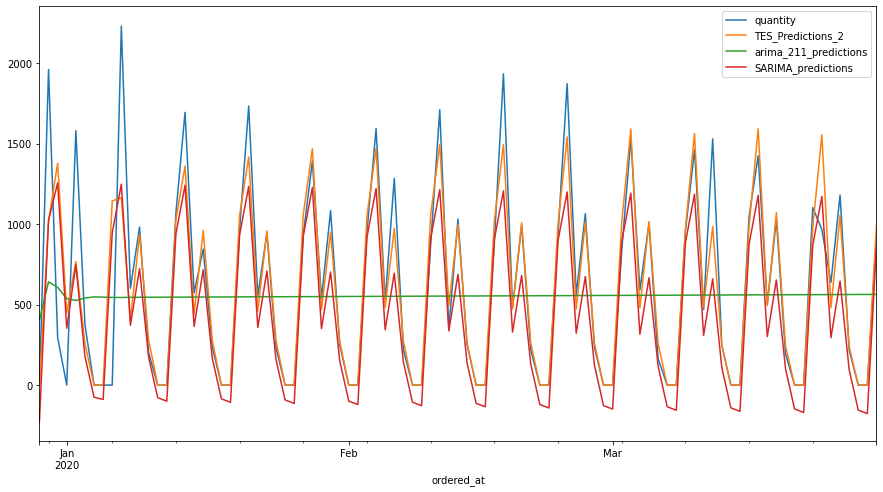

In [315]:
test[['quantity','TES_Predictions_2','arima_211_predictions','SARIMA_predictions']].plot(figsize =(15,8));

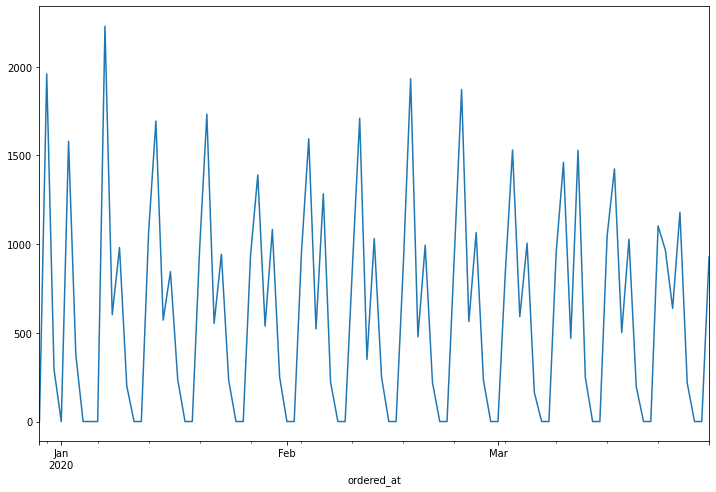

In [316]:
prod_1_daily['2019-12-29':]['quantity'].plot()

In [341]:
rmse(test['quantity'], test['SARIMA_predictions'])

330.97871171335385

In [342]:
smape(test['quantity'], test['SARIMA_predictions'])

88.73728334751563

In [344]:
test.tail()

,quantity,TES_Predictions_1,TES_Predictions_2,arima_010_predictions,arima_211_predictions,SARIMA_predictions
ordered_at,,,,,,
2020-03-26,1180.0,1042.434432,1052.725586,562.422227,562.422227,645.929007
2020-03-27,218.0,243.167074,239.625542,562.643832,562.643832,96.008032
2020-03-28,0.1,8.837612,0.101731,562.865437,562.865437,-155.407280
2020-03-29,0.1,9.199697,0.101802,563.087042,563.087042,-176.912174
2020-03-30,928.0,988.428051,994.032105,563.308647,563.308647,862.307792


## Including seasonality into the model gave better predictions than when neglected. But still, the results were not better than TES

In [346]:
sarima_final_model = SARIMAX(prod_1_daily['quantity'], order= (2, 1, 0), seasonal_order=(1, 0, 1, 7)).fit()

In [347]:
prod_1_pred['SARIMA_predictions'] = sarima_final_model.predict(start=len(prod_1_daily), end= len(prod_1_daily)+3, 
                                                                 dynamic=False, typ= 'levels')

## Seasonal ARIMA also taking external factors like temperature into consideration:
Does knowing the temperature help us to predict the future more accurately?

In [348]:
temperature = city_temperature[city_temperature['cities_id']==4]
temperature.head(15)

,Unnamed: 0,Max_temp,date,cities_id
6550,6551,11.13,2013-01-01,4
6551,6552,12.99,2013-01-02,4
6552,6553,15.26,2013-01-03,4
6553,6554,16.29,2013-01-04,4
6554,6555,18.58,2013-01-05,4
6555,6556,16.79,2013-01-06,4
6556,6557,17.69,2013-01-07,4
6557,6558,15.18,2013-01-08,4
6558,6559,13.19,2013-01-09,4
6559,6560,13.23,2013-01-10,4


In [349]:
temperature.dtypes

Unnamed: 0      int64
Max_temp      float64
date           object
cities_id       int64
dtype: object

In [350]:
temperature['date'] = pd.to_datetime(temperature['date'], format= '%Y-%m-%d')

In [351]:
temperature.drop(labels='Unnamed: 0', axis =1,inplace=True)
#temperature.groupby()
temperature.head()

,Max_temp,date,cities_id
6550,11.13,2013-01-01,4
6551,12.99,2013-01-02,4
6552,15.26,2013-01-03,4
6553,16.29,2013-01-04,4
6554,18.58,2013-01-05,4


In [352]:
temperature.set_index('date', inplace=True)
temperature.head()

,Max_temp,cities_id
date,,
2013-01-01,11.13,4
2013-01-02,12.99,4
2013-01-03,15.26,4
2013-01-04,16.29,4
2013-01-05,18.58,4


In [358]:
train.tail()

,quantity
ordered_at,
2019-12-24,780.0
2019-12-25,0.1
2019-12-26,0.1
2019-12-27,470.0
2019-12-28,0.1


In [378]:
# monthly_avg_temperature = pd.DataFrame(temperature['Max_temp'].resample('MS', how = 'mean'))
# monthly_avg_temperature.columns = ['avg_temperature']
# monthly_avg_temperature_historical = monthly_avg_temperature['2017-04-01':'2020-02-01']
# monthly_avg_temperature_pred = monthly_avg_temperature['2020-03-01':'2020-06-01']
# monthly_avg_temperature_historical.index
prod_1_temperature = temperature['2017-04-03':'2020-03-30']
prod_1_temperature.drop(labels = 'cities_id', axis = 1, inplace = True)

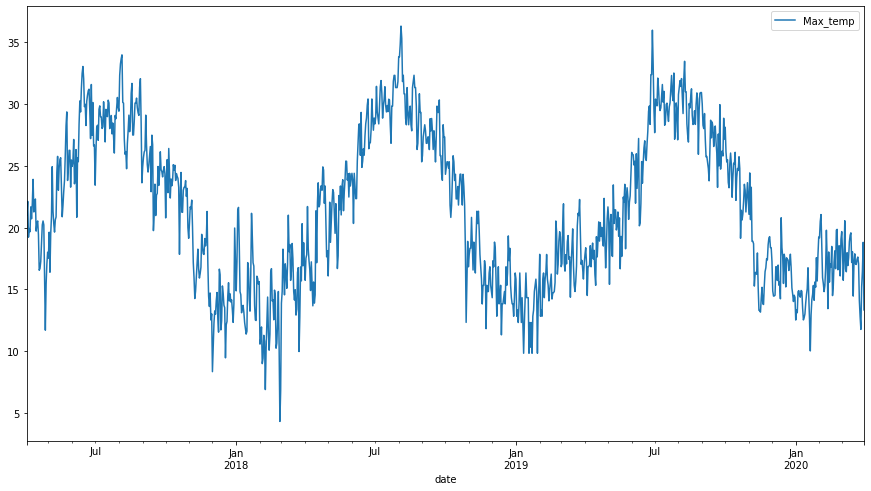

In [379]:
train_temp = prod_1_temperature[:'2019-12-28']
test_temp = prod_1_temperature['2019-12-28':]
prod_1_temperature['2017-04-01':'2020-06-01'].plot(figsize = (15,8), legend = True);

In [385]:
prod_1_temperature.index.freq = "D"
prod_1_temperature.index

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-09', '2017-04-10',
               '2017-04-11', '2017-04-12',
               ...
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30'],
              dtype='datetime64[ns]', name='date', length=1093, freq='D')

In [386]:
adf_test(prod_1_temperature['Max_temp'])

Augmented Dickey-Fuller Test: AgroFresc Product 1
ADF test statistic        -1.457790
p-value                    0.554279
# lags used               17.000000
# observations          1075.000000
critical value (1%)       -3.436448
critical value (5%)       -2.864232
critical value (10%)      -2.568204
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [387]:
auto_arima(prod_1_daily['quantity'],exogenous= prod_1_temperature[['Max_temp']],  
           seasonal=True, m=7, max_P=3, max_Q=3, start_P=0, start_Q=0).summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

KeyboardInterrupt: 

In [195]:
sarimax_train_model = SARIMAX(train['quantity'], exog=train_temp[['avg_temperature']], order=(0, 1, 0), enforce_invertibility=False).fit()
test['SARIMAX_predictions'] = sarimax_train_model.predict(start = start, end = end, exog=test_temp[['avg_temperature']])

In [196]:
rmse(test['quantity'], test['SARIMAX_predictions'])

3255.0375289308417

In [197]:
smape(test['quantity'], test['SARIMAX_predictions'])

16.889753768301123

In [198]:
sarimax_final_model = SARIMAX(prod_1_daily['quantity'], exog = monthly_avg_temperature_historical[['avg_temperature']],
                             order=(0, 1, 0), enforce_invertibility=False).fit()
prod_1_pred['SARIMAX_predictions'] = sarimax_final_model.predict(start=len(prod_1_daily), end= len(prod_1_daily)+3, 
                                                                exog = monthly_avg_temperature_pred[['avg_temperature']], 
                                                                 typ= 'levels')

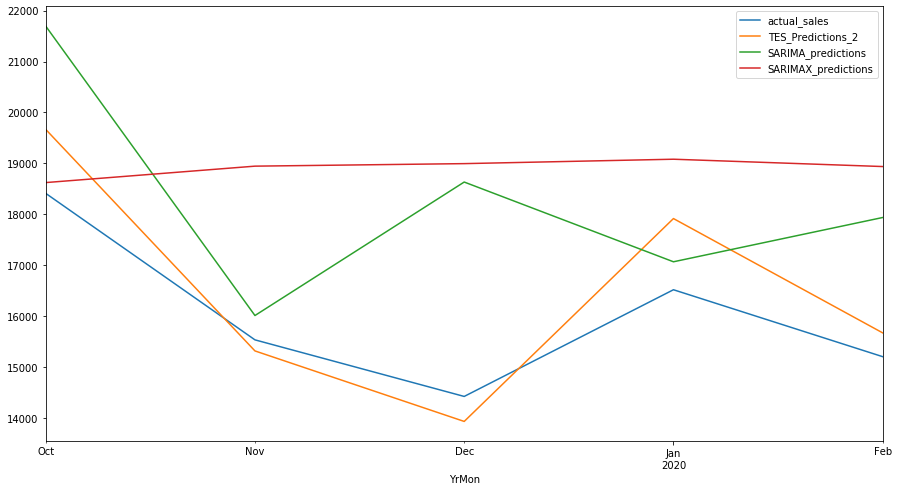

In [199]:
test[['quantity', 'TES_Predictions_2', 'SARIMA_predictions', 'SARIMAX_predictions']].plot(figsize=(15,8), legend = True);

## SARIMAX with external temperature into consideration is performing better when compared to a normal SARIMA. But, it is still underperforming than Triple Exponential Smoothing

Reasons for this could be:
1. Very small Dataset to train
2. Averaging the temperature over a month is giving wrong representation of temperature trend



In [200]:
prod_1_pred

,TES_predictions,ARIMA_210_predictions,SARIMA_predictions,SARIMAX_predictions
2020-03-01,15956.206578,14901.176471,15210.0,15214.332114
2020-04-01,15428.849011,14592.352941,15210.0,15193.003786
2020-05-01,13984.297709,14283.529412,15210.0,15150.302222
2020-06-01,13045.015996,13974.705882,15210.0,15098.884184


In [201]:
test

,actual_sales,TES_Predictions_1,TES_Predictions_2,arima_010_predictions,SARIMA_predictions,SARIMAX_predictions
YrMon,,,,,,
2019-10-01,18414,21036.011029,19668.582267,18224.482759,21694.907589,18625.097455
2019-11-01,15540,15008.424902,15322.932673,17974.965517,16017.313313,18947.329631
2019-12-01,14430,12509.788505,13939.709764,17725.448276,18635.695900,18996.821054
2020-01-01,16523,18588.558344,17919.367482,17475.931034,17071.494876,19083.395709
2020-02-01,15210,15067.713598,15676.691891,17226.413793,17940.140074,18939.666003


# Granger Causality Tests (Descriptive statistics notebook)